In [1]:
#import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#load data
train = pd.read_csv("Boston.csv")

train = train.loc[:, ~train.columns.str.contains('^Unnamed')]
#train.drop(columns=['medv'])

train.head(10)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# 1.1 Missing values

In [2]:
# 1.1 missing data
train[train.isnull().values==True]

train.info()

#from the info, no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


from the info above, there are no missing values



# 1.2 Summary statistics of Numeral features

In [3]:
#1.2.statistical summary of data

train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 1.3 Distributions of features

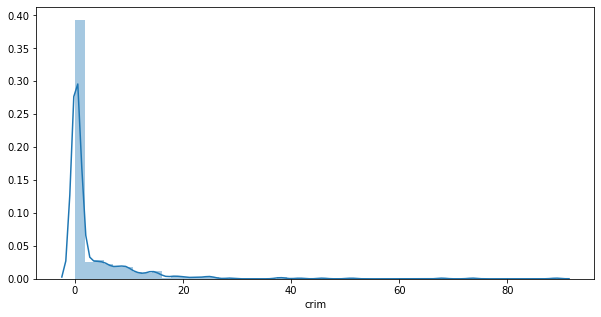

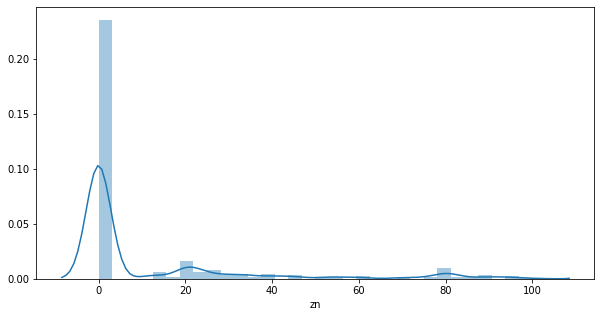

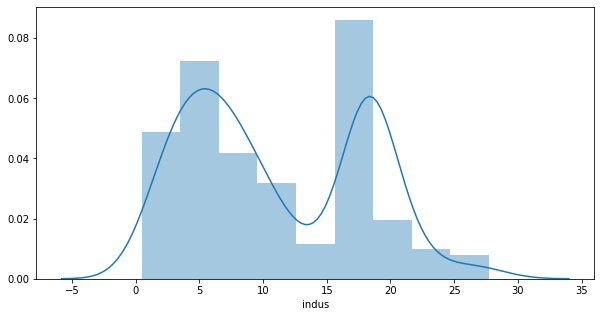

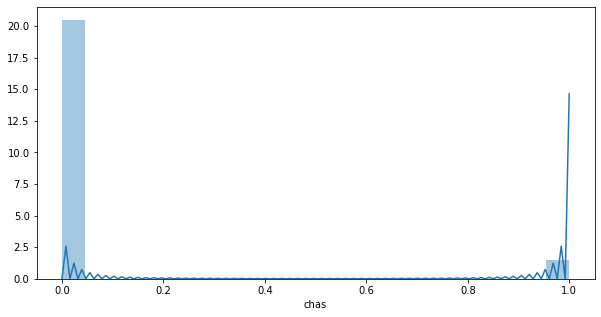

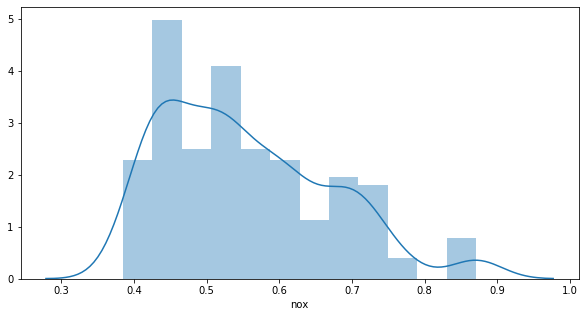

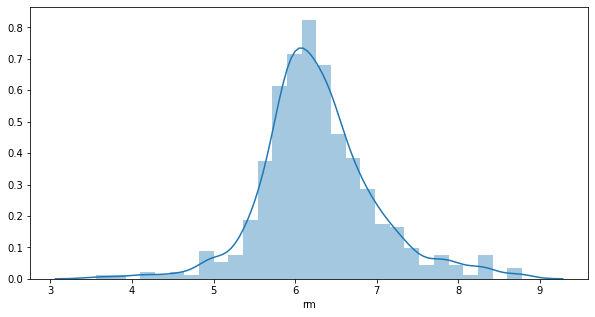

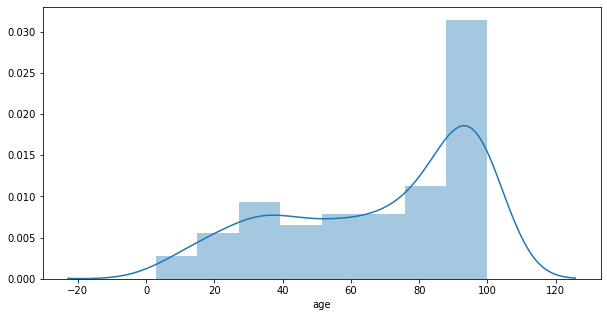

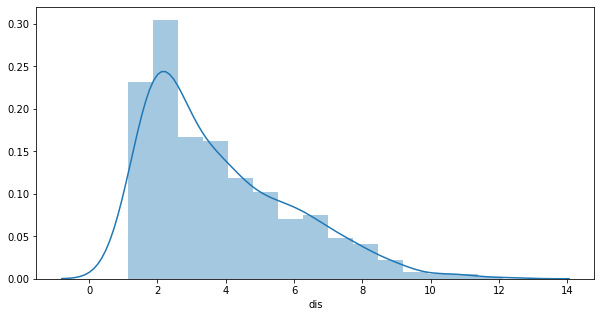

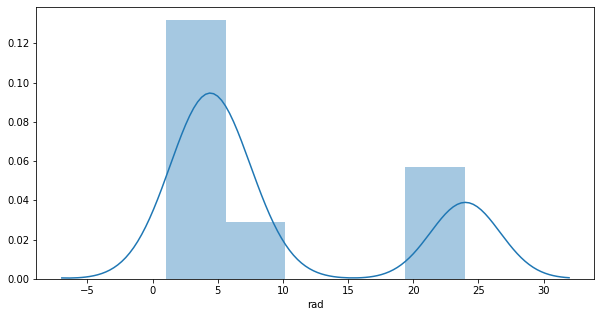

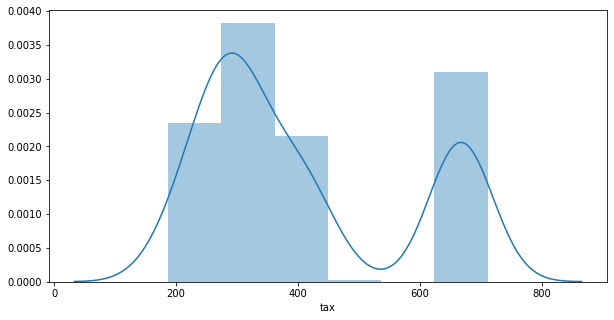

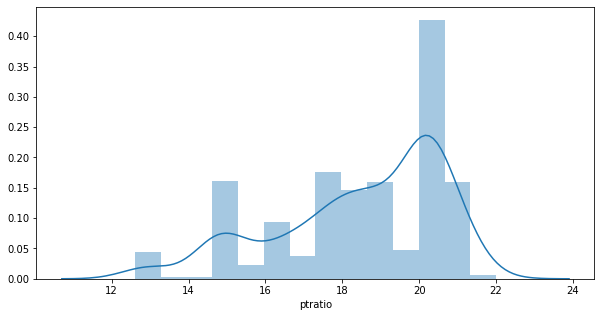

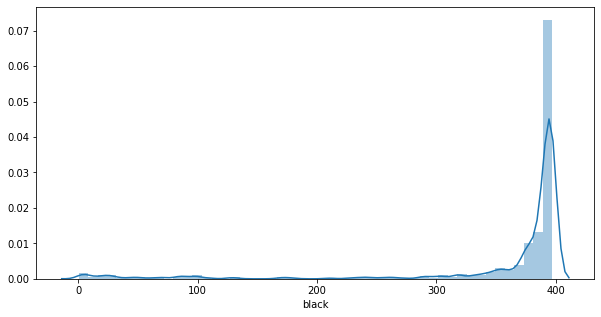

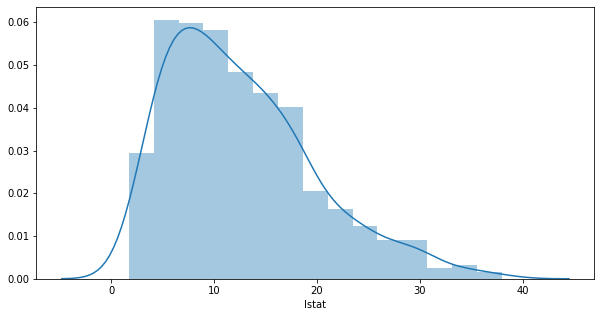

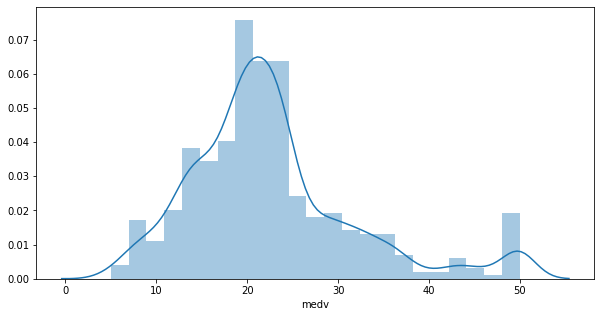

In [4]:
#1.3.distributions of features
for i in train:
    #print(i)
    plt.figure(figsize=(10,5))
    sns.distplot(train[i])

#Figures below show the distributions of all these features: features like nox, rm, lstat, ptratio look like are 
# in Gaussian distribution.   indus, rad and tax are in bimodal distribution.

Figures above shows the distributions of all these features: features like nox, rm, lstat, ptratio look like are in Gaussian distribution.  indus, rad and tax are in bimodal distribution.


# 2 Correlated features

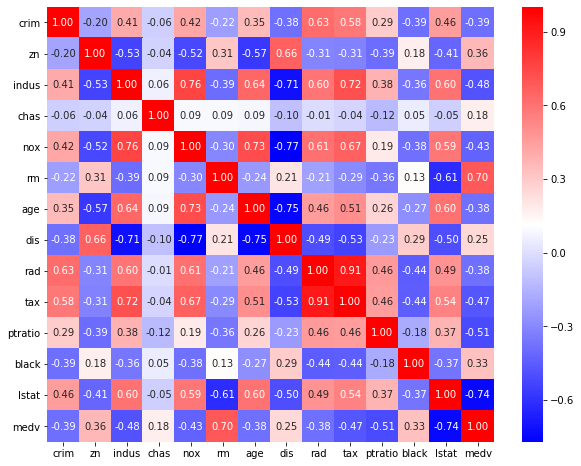

In [5]:
#2.correlated variables
plt.figure(figsize=(10,8))
corr = train.corr()
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap = "bwr")
plt.show()
#rm  ptratio lstat

From the heatmap above, lstat,rm and ptratio are most correlated with housing price(medv).

# 3 Generate a new feature and plot

new_feature:
0      31.91
1      31.27
2      31.27
3      24.38
4      24.38
       ...  
501    39.23
502    39.23
503    39.23
504    39.23
505    39.23
Length: 506, dtype: float64
corr: -0.502669392345297


Text(0, 0.5, 'housing price')

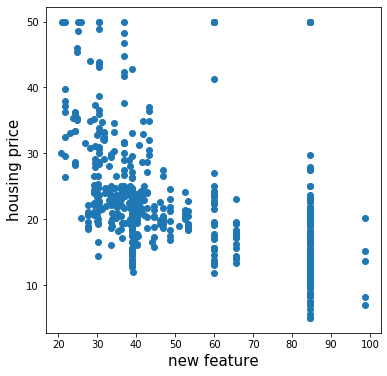

In [6]:
#3.generate a new feature

corr1 = 0
newfeab=0
for i in range(300):
    newfea = train['indus'].add(train['tax'].mul(0.1*i))
    #newfea = newfea.sub(train['rm'].mul(5))
    if newfea.corr(train['medv']) < corr1:
        corr1 = newfea.corr(train['medv'])
        newfeab = newfea
        #print(corr)
newfeab.columns='new_feature'

print('new_feature:')
print(newfeab)

#plot the relationship of new feature with housing price
print('corr:',newfeab.corr(train['medv']))
plt.figure(figsize=(6,6))
plt.scatter(newfeab,train['medv'])
plt.xlabel('new feature',size=15)
plt.ylabel('housing price',size=15)


# 4.Develop a model and make predictions

In [10]:
##4.with sklearn, develop a model and make predictions

# extract data, include features most related to price
price = train["medv"]
features = train[['rm','ptratio','lstat']]
#features = train.loc[:, ~train.columns.str.contains('medv')]
#features = train[['rm','ptratio','lstat','indus','tax']]


#import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

#split training and target data
Xtrain, Xtest, ytrain, ytest = train_test_split(features, price, test_size=0.2, random_state=3)

#fit a model
#model = DecisionTreeRegressor(max_depth=4)
model = LinearRegression()
model.fit(Xtrain, ytrain)
print(model)

#make predictions
predicted = model.predict(Xtest)

#r2 mse & rmse
print('r2:',metrics.r2_score(ytest,predicted))
print('mse:',metrics.mean_squared_error(ytest,predicted))
print('rmse:',np.sqrt(metrics.mean_squared_error(ytest,predicted)))
#print(metrics.mean_absolute_error(ytest,predicted))



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
r2: 0.7535315866632102
mse: 20.396444981648425
rmse: 4.516242351961243


predictions: [45.25217391 16.77058824 14.73333333 28.059375   23.975      23.975
 14.73333333 10.38571429 23.975      15.89       15.89       30.825
 34.34285714 20.64       10.38571429 10.38571429 20.88131868 14.73333333
 14.73333333 23.975      28.059375   45.25217391 23.975      23.975
 10.38571429 23.975      18.975      20.88131868 20.88131868 20.88131868
 14.73333333 37.05       20.88131868 20.88131868 18.975      10.38571429
 23.975      34.34285714 23.975      23.975      20.64       10.38571429
 18.975      14.73333333 20.88131868 28.059375   20.88131868 15.89
 28.059375   20.88131868 28.059375   20.88131868 45.25217391 20.64
 20.88131868 20.88131868 45.25217391 14.73333333 30.825      20.88131868
 20.88131868 20.88131868 28.059375   30.825      20.88131868 23.975
 30.825      23.975      28.059375   23.975      23.975      20.88131868
 20.64       28.059375   10.38571429 18.975      20.88131868 23.975
 23.975      16.77058824 28.059375   14.73333333 10.38571429 23.975
 20.881

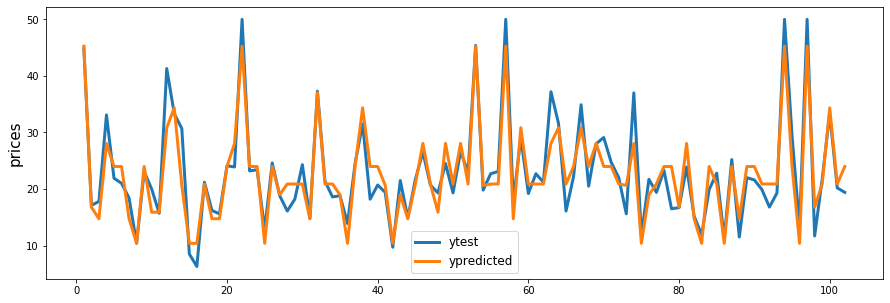

In [8]:
#plot the predictions

times = [x for x in range(1,103)]

plt.figure(figsize=(15,5))
plt.plot(times,ytest, label="ytest", lw=3)
plt.plot(times,predicted, label="ypredicted",lw=3)
plt.ylabel('prices',size=15)
plt.legend(fontsize=12)
print('predictions:',predicted)

Text(0, 0.5, 'y_predicted')

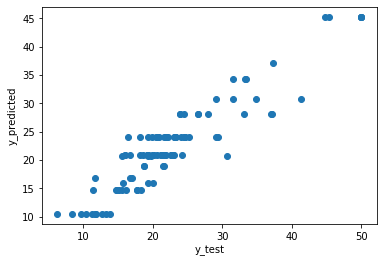

In [9]:
plt.scatter(ytest,predicted)
plt.xlabel('y_test')
plt.ylabel('y_predicted')